<a href="https://colab.research.google.com/github/Kimeungseok/Kimeungseok/blob/main/M_learning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로직스틱 회귀분석 머시러닝

In [ ]:
import pandas
aaa = pandas.read_csv('b_cancer.csv')

# 문자 -> 숫자 변환(0,1)

aaa['Class'] = aaa['Class'].map({'malignant':1, 'benign':0})

aaa.head(10)

In [23]:
# 결측치 확인 및 처리 -> 일단 평균으로 대체 #

aaa.isnull().sum()

aaa['Bare.nuclei'].fillna(value=aaa['Bare.nuclei'].mean(), inplace=True)

aaa.isnull().sum()

# features, 결과 정의 #

features1 = aaa[['Cl.thickness','Cell.size','Cell.shape','Marg.adhesion',
                 'Epith.c.size','Bare.nuclei','Bl.cromatin','Normal.nucleoli',
                 'Mitoses']]
judges = aaa['Class']

In [36]:
# 학습 데이터셋, Test 데이터셋 구분 #


from sklearn.model_selection import train_test_split

trset1, ttset1, trlabel1, ttlabel1 = train_test_split(features1, judges, test_size=0.25, random_state=42)

print(len(trset1), len(ttset1))

524 175


In [32]:
# 데이터 정규화 #

from sklearn.preprocessing import StandardScaler

trans1 = StandardScaler()

trset1 = trans1.fit_transform(trset1)
ttset1 = trans1.fit_transform(ttset1)

# print(tr_set1)
# print(tt_set1)

In [38]:
# Logistic 회귀 분석 학습 #


from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(trset1, trlabel1)

LogisticRegression()

LogisticRegression()

In [68]:
# 학습 모델 성능 검사 #

accu_tr1 = model1.score(trset1, trlabel1)
accu_tt1 = model1.score(ttset1, ttlabel1)

print('학습데이터 정확도 : ', round(accu_tr1,3))
print('검증데이터 정확도 : ', round(accu_tt1,3))



학습데이터 정확도 :  0.956
검증데이터 정확도 :  0.983


In [42]:
# 로지스틱 회귀 계수 확인 #

model1.coef_


array([[ 0.50950053, -0.03402653,  0.43683193,  0.19527758,  0.14742928,
         0.42291096,  0.38632809, -0.01193166,  0.36936928]])

In [54]:
# 새로운 데이터에 대한 예측 #


import pandas
bbb = pandas.read_csv('b_cancer_new.csv')

# bbb.head()

from sklearn.preprocessing import StandardScaler

features2 = bbb[['Cl.thickness','Cell.size','Cell.shape','Marg.adhesion',
                 'Epith.c.size','Bare.nuclei','Bl.cromatin','Normal.nucleoli',
                 'Mitoses']]

trans1 = StandardScaler()
bbb = trans1.fit_transform(bbb)


pre1 = model1.predict(features2)
print(pre1)

# 새로운 데이터에 대한 확률 #

model1.predict_proba(features2)


[0 1 0 1]


array([[0.94864971, 0.05135029],
       [0.33842023, 0.66157977],
       [0.99115447, 0.00884553],
       [0.02363114, 0.97636886]])

[[116   1]
 [  2  56]]


Text(50.722222222222214, 0.5, 'True Label')

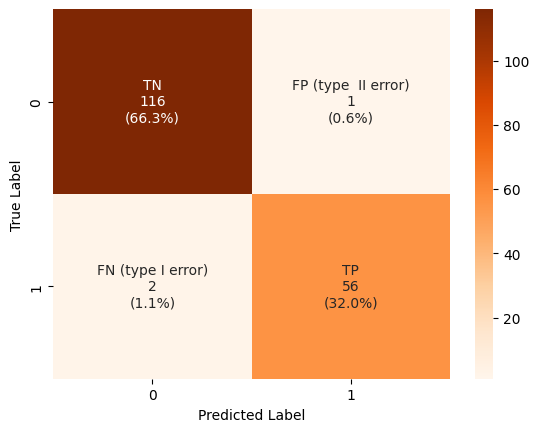

In [101]:
# Confusion Matrix #

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import numpy as np

import matplotlib.pyplot as plt
import seaborn

pre1 = model1.predict(ttset1)               # 예측 결과 입력 #

cm = confusion_matrix(pre1, ttlabel1)

print(cm)

gr_names = ["TN", "FP (type  II error)", "FN (type I error)", "TP"]
gr_counts = [value for value in cm.flatten()]

gr_per = [f"{value:.1%}" for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(gr_names,gr_counts,gr_per)]
labels = np.asarray(labels).reshape(2,2)

seaborn.heatmap(cm, annot=labels, fmt='', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [88]:
# Confutions Matrix 이쁘게 꾸미기 #

gr_names = ["TN", "FP (type  II error)", "FN (type I error)", "TP"]
gr_counts = [value for value in cm.flatten()]

gr_per = [f"{value:.1%}" for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(gr_names,gr_counts,gr_per)]

labels = np.asarray(labels).reshape(2,2)
labels


array([['TN\n116\n(66.3%)', 'FP (type  II error)\n1\n(0.6%)'],
       ['FN (type I error)\n2\n(1.1%)', 'TP\n56\n(32.0%)']], dtype='<U28')